In [ ]:
# Task 2: Visualizing Features Across Layers

## Introduction
"""

In this task, we will explore how a Convolutional Neural Network (CNN) processes a single image through **different layers**. Each layer of a CNN detects different types of features:

- **Early layers:** Detect simple patterns like edges and colors.
- **Middle layers:** Detect more complex shapes and textures.
- **Deeper layers:** Detect high-level patterns and object parts.

**What You Will Do:**

1. Select a single image from the dataset.
2. Pass it through multiple convolutional layers of a CNN.
3. Visualize the **feature maps** (outputs of the filters) for each layer.
4. Observe how the image is represented differently at each layer.

**Key Points to Observe:**

- How the patterns evolve from simple to complex.
- Differences in activation intensity (some features are stronger than others).
- How the network “sees” the image differently at each layer.

**Instructions:**

- Run the code cells step by step.
- Look carefully at the visualizations and think about how these features might help the CNN classify the image."""


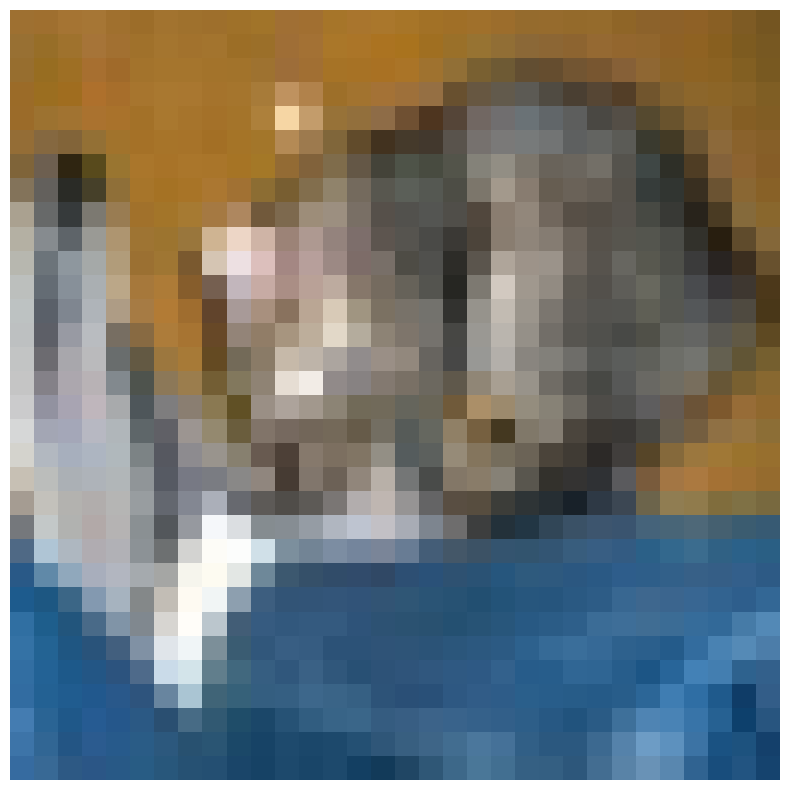

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


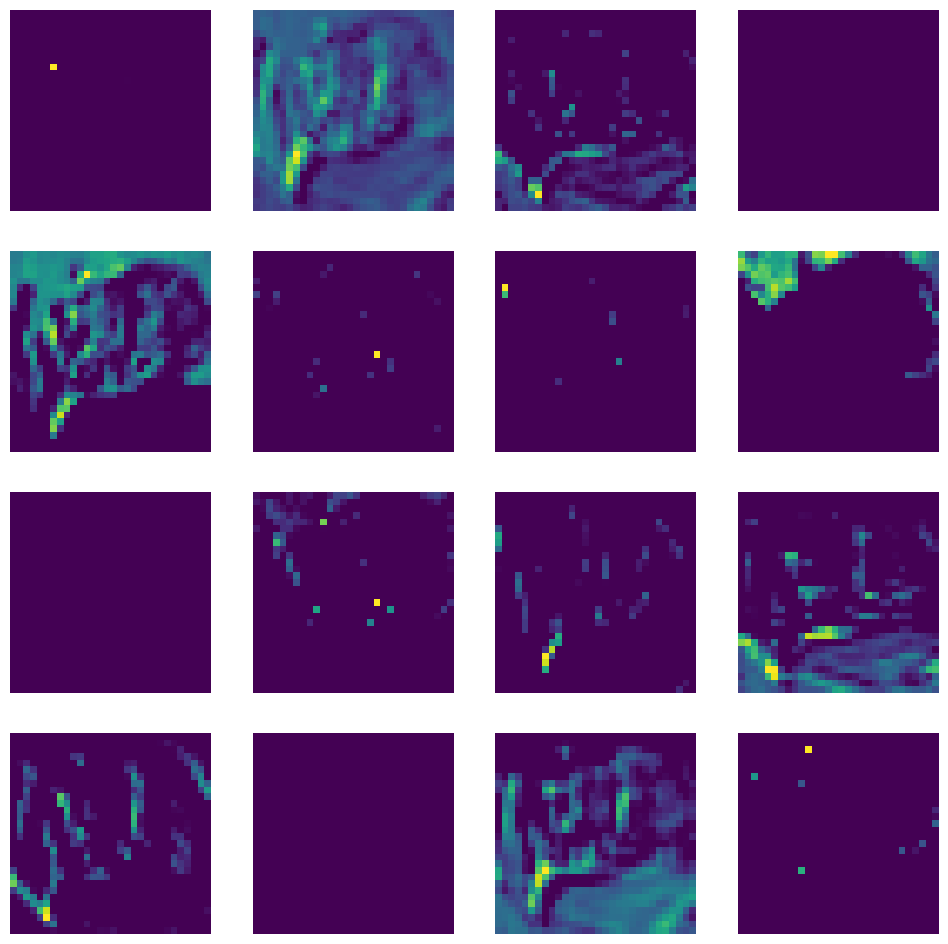

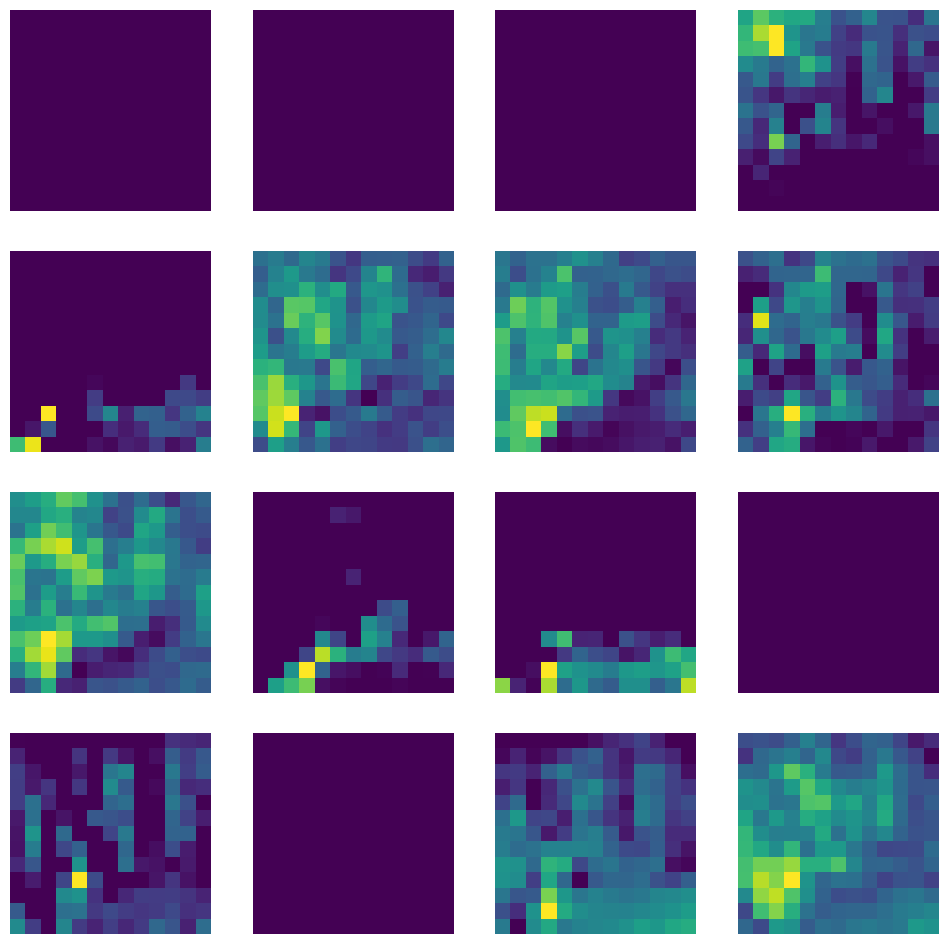

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# 1. Load CIFAR-10
# -------------------------------
(_, _), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_test = x_test / 255.0
cifar10_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Pick one test image
img = x_test[0:1]

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.squeeze(img))
ax.axis("off")
plt.show()

# -------------------------------
# 2. Build a simple CNN using Functional API
# -------------------------------
inputs = layers.Input(shape=(32,32,3))
x = layers.Conv2D(32, (3,3), activation='relu', name='conv1')(inputs)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(64, (3,3), activation='relu', name='conv2')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# -------------------------------
# 3. Create model to output intermediate conv layers
# -------------------------------
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# -------------------------------
# 4. Forward pass to get activations
# -------------------------------
activations = activation_model.predict(img)

# -------------------------------
# 5. Visualize first 2 conv layers
# -------------------------------
for layer_index, layer_activation in enumerate(activations[:2]):
    n_features = layer_activation.shape[-1]
    plt.figure(figsize=(12,12))
    for i in range(min(16, n_features)):
        plt.subplot(4,4,i+1)
        plt.imshow(layer_activation[0,:,:,i], cmap='viridis')
        plt.axis('off')
    plt.show()


In [ ]:
# Task 2: Visualizing CNN Features Across Layers

## Introduction
"""

In this task, we will explore **how a Convolutional Neural Network (CNN) processes an image** through its convolutional layers.
Each layer detects different patterns in the image, and we can visualize these patterns as **feature maps**.

### What You Will See
- Each image corresponds to the **output of a single filter** in a convolutional layer.
- Bright areas indicate **strong activation**, meaning the filter detected its preferred pattern there.
- Dark areas indicate **weak activation**, meaning the filter did not detect that pattern.

### Early vs. Deeper Layers
- **First convolutional layer**: Detects simple features like edges, lines, and color contrasts.
- **Second (or deeper) convolutional layers**: Detect more complex shapes, textures, or object parts.
  - These may look abstract because the network combines simpler features to understand the image.

### How to Interpret Filters
- Each filter in a layer looks for a **different feature**.
- By looking at multiple filters side by side, you can see how the network detects edges, textures, and other patterns simultaneously.
- Observing the activations helps you understand **what the CNN “sees”** at each stage.

### Reflection Questions
- What patterns do you notice in the first layer?
- How do the patterns change in the second layer?
- Which filters seem most active for this image? Why might that be?
- How might these features help the network classify the image correctly?"""
